# Preprocessing

In [4]:
# Needed libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Anova feat selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Decision Tree classifier
from sklearn import tree

#Tree Feature Selection 
from sklearn.ensemble import RandomForestClassifier 
# Import the RFE from sklearn library
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
# Import the RFE from sklearn library
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# Scaling
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Gives func get_anova_feat for anova selection
%run getAnovaFeat.py
##############################################################
## All model files should return model for confusion matrix ##
##############################################################
# Gives func knn_pred for knn classifier
%run knn.py

# Gives func decision_tree_pred for classifier
%run dt.py

# Gives func ridge_reg_pred for classifier
%run ridge.py

# Gives func rf_pred for classifier
%run randForest.py

#Gives func for tree based feature selection 
%run treeFeatureSelect.py

In [3]:
# Importing both csv and joining
df1 = pd.read_csv("Data/public-annotations.csv")
df2 = pd.read_csv("Data/public_cohen_dataset_features.csv")
df = df1.join(df2)

# Dropping J- measurements for "junior"
df = df.drop(['S-A', 'S-B', 'S-C', 'S-D', 'S-E', 'S-F', 'J-A', 'J-B', 'J-C', 'J-D', 'J-E', 'J-F', 'J-Global'], axis = 1)

# Adding severity class 1, 2, 3
df['s_class'] = 0

for i in range(192):
    if df.iloc[i, 1] <= 6:
        df.iloc[i, 109] = 1
        continue
    elif df.iloc[i, 1] <= 12:
        df.iloc[i, 109] = 2
        continue
    else:
        df.iloc[i, 109] = 3
        
        
# dropping filename column and S-Global score
df_features = df.drop('filename', axis = 1)
df_features = df_features.drop('S-Global', axis = 1)


In [5]:
# Setting features and response
X = df_features.iloc[:, 0:107]
Y = df_features.iloc[:, 107:108]

# Splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
y_train = np.ravel(y_train)

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns, index = X_train.index)

# Total of each class in train
print(sum(y_train == 1), sum(y_train == 2), sum(y_train == 3))

58 70 25


In [7]:
X_normalized.describe

<bound method NDFrame.describe of      original_shape_Elongation  original_shape_Flatness  \
166                   0.647887                      0.0   
132                   0.750301                      0.0   
46                    0.973038                      0.0   
44                    0.693357                      0.0   
12                    0.449930                      0.0   
..                         ...                      ...   
148                   0.547546                      0.0   
137                   0.409656                      0.0   
156                   0.752691                      0.0   
15                    0.552528                      0.0   
99                    1.000000                      0.0   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
166                             0.0                        0.756983   
132                             0.0                        0.710474   
46                              0.0         

## Lasso Regression

In [5]:
# Declaring Lasso model
clf = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_scaled, y_train)
test_score = clf.score(X_scaled, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_scaled, y_train)

# evaluate model
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy on test data: %.3f || CV Accuracy: %.3f' % (test_score , mean(scores)))

Accuracy on test data: 0.765 || CV Accuracy: 0.536


In [8]:
# Declaring Lasso model
clf = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_normalized, y_train)
test_score = clf.score(X_normalized, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_normalized, y_train)

# evaluate model
scores = cross_val_score(model, X_normalized, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy on test data: %.3f || CV Accuracy: %.3f' % (test_score , mean(scores)))

Accuracy on test data: 0.614 || CV Accuracy: 0.542


# Ridge regression 
### Feature Selection - ANOVA
**55 Features**

In [6]:
X_train_selected_ANOVA = get_anova_feat(55, X_scaled, y_train)

# ridge_reg_pred(X_train_selected_ANOVA, y_train)
model = ridge_reg_pred(X_train_selected_ANOVA, y_train)

T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy on test data: 0.791 || CV Accuracy: 0.541


In [7]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[41, 15,  2],
       [ 7, 61,  2],
       [ 0,  6, 19]], dtype=int64)

**19 features (rule of ten)**

In [8]:
X_train_selected_ANOVA = get_anova_feat(19, X_scaled, y_train)

# Retrying Log Regression with ANOVA selected features
model = ridge_reg_pred(X_train_selected_ANOVA, y_train)

T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy on test data: 0.673 || CV Accuracy: 0.566


In [9]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[33, 22,  3],
       [11, 55,  4],
       [ 1,  9, 15]], dtype=int64)

# KNN
## Feature Selection - ANOVA
**55 Features**

In [10]:
# KNN 55 features K = 5
X_train_selected_ANOVA = get_anova_feat(55, X_scaled, y_train)

model = knn_pred(X_train_selected_ANOVA, y_train, 5)

Accuracy on test data: 0.654 || CV Accuracy: 0.483


T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [11]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[38, 19,  1],
       [14, 55,  1],
       [ 4, 14,  7]], dtype=int64)

**19 Features**

In [12]:
# KNN 19 Features K = 5
X_train_selected_ANOVA = get_anova_feat(19, X_scaled, y_train)

model = knn_pred(X_train_selected_ANOVA, y_train, 5)

Accuracy on test data: 0.634 || CV Accuracy: 0.405


T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [13]:
y_pred = model.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[37, 21,  0],
       [22, 47,  1],
       [ 6,  6, 13]], dtype=int64)

# Decision Tree
## Feature Selection - ANOVA
**55 Features**

In [14]:
#Selecting features for the model 
X_train_selected_ANOVA = get_anova_feat(55, X_scaled, y_train)

# decision_tree_pred(X_train_selected_ANOVA, y_train)
model = decision_tree_pred(X_train_selected_ANOVA, y_train)

Accuracy on test data: 1.000 || CV Accuracy: 0.385


T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


**19 Features**

In [15]:
#Selecting features for the model 
X_train_selected_ANOVA = get_anova_feat(19, X_scaled, y_train)

# decision_tree_pred(X_train_selected_ANOVA, y_train)
model = decision_tree_pred(X_train_selected_ANOVA, y_train)

Accuracy on test data: 1.000 || CV Accuracy: 0.463


T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
T:\Users\Luke\anaconda3\envs\capstone\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Random Forest 

**Max-depth = 3**

In [16]:
model = rf_pred(X_scaled, y_train, 3)

Accuracy on test data: 0.784 || CV Accuracy: 0.523


#  Tree Based Feature Selection


Accuracy of full random forest on test data: 1.000 || CV Accuracy: 0.496


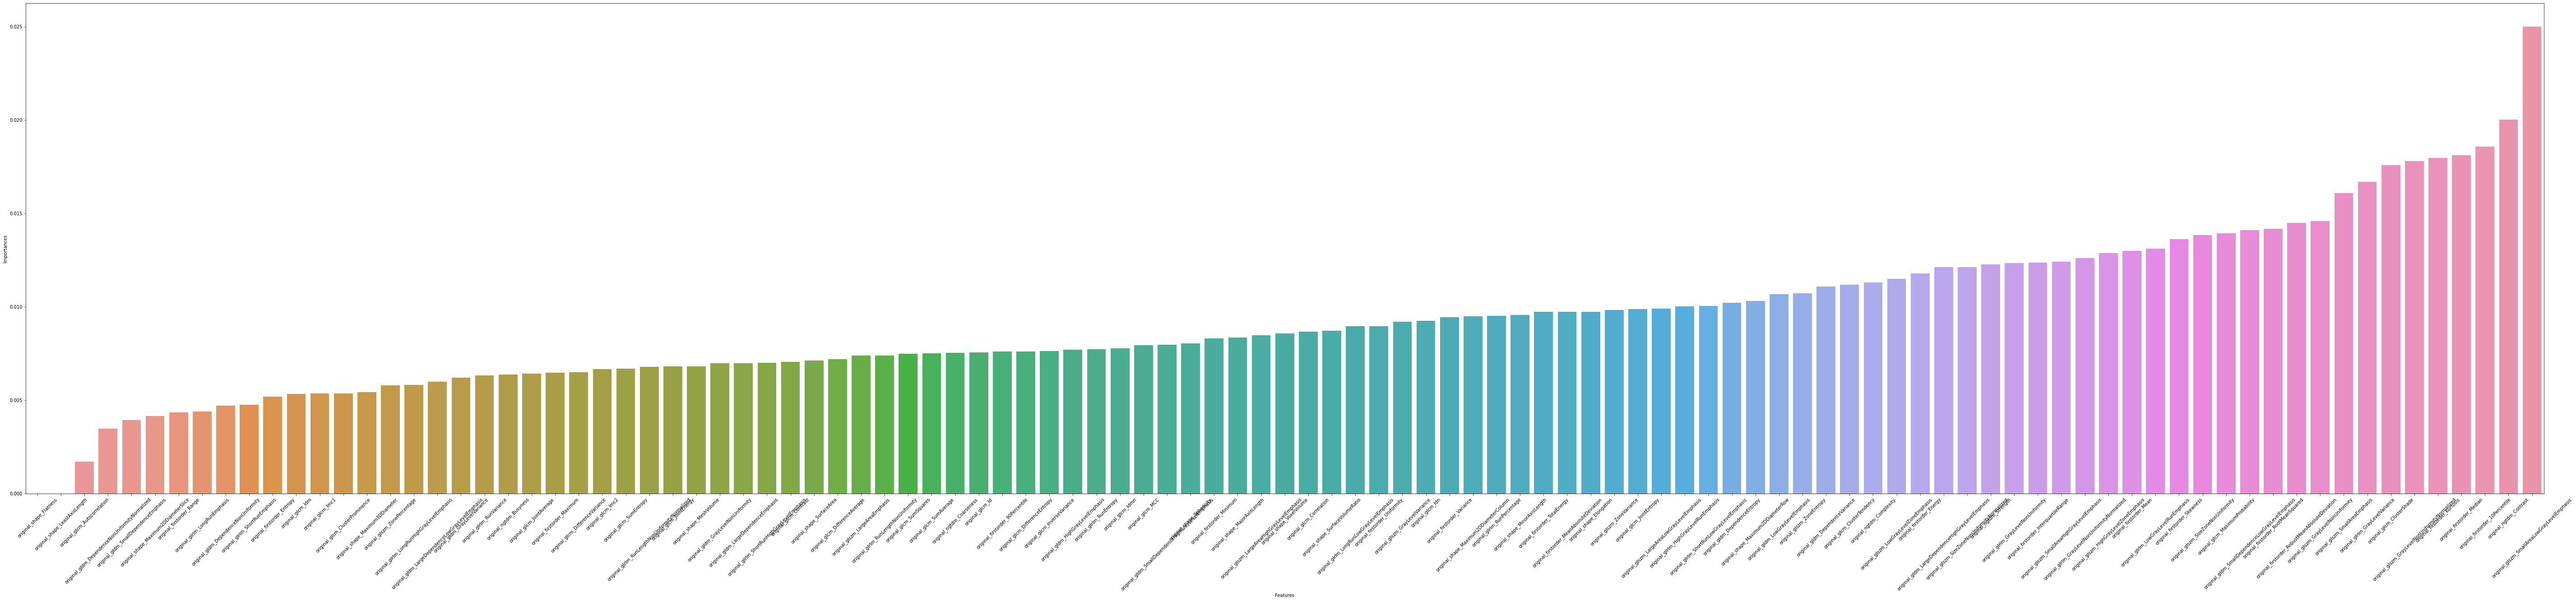

In [17]:
rand_forest(X_normalized, y_train, X, max_depth=15)

In [21]:
featureSelectedTree = treeFeatureSelection(X_scaled, y_train, 10)

Accuracy of feature selected random forest on test data: 1.000 || CV Accuracy: 0.535


In [ ]:
for i in range(5,30):
    print(str(i) + " Features")
    featureSelectedTree = treeFeatureSelection(X_scaled, y_train, i)